In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('/content/diabetic_data.csv')

In [3]:
data.shape

(33243, 50)

In [4]:
data.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
33238,105265992,104815368,AfricanAmerican,Male,[40-50),?,1,1,7,5.0,...,No,Steady,Steady,No,No,No,No,Ch,Yes,>30
33239,105266388,107942895,Caucasian,Female,[50-60),?,1,6,7,5.0,...,No,No,No,No,No,No,No,No,No,NO
33240,105267612,25969050,Caucasian,Female,[80-90),?,1,6,17,5.0,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
33241,105269910,5331294,AfricanAmerican,Male,[70-80),?,1,1,7,4.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
33242,105272532,25817553,?,Male,[60-70),?,1,1,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33243 entries, 0 to 33242
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encounter_id              33243 non-null  int64  
 1   patient_nbr               33243 non-null  int64  
 2   race                      33243 non-null  object 
 3   gender                    33243 non-null  object 
 4   age                       33243 non-null  object 
 5   weight                    33243 non-null  object 
 6   admission_type_id         33243 non-null  int64  
 7   discharge_disposition_id  33243 non-null  int64  
 8   admission_source_id       33243 non-null  int64  
 9   time_in_hospital          33242 non-null  float64
 10  payer_code                33242 non-null  object 
 11  medical_specialty         33242 non-null  object 
 12  num_lab_procedures        33242 non-null  float64
 13  num_procedures            33242 non-null  float64
 14  num_me

In [6]:
data.nunique()

,0
encounter_id,33243
patient_nbr,25103
race,6
gender,3
age,10
weight,10
admission_type_id,7
discharge_disposition_id,22
admission_source_id,11
time_in_hospital,14


In [7]:
data.replace('?', np.NaN, inplace=True)

In [8]:
data.isna().sum()

,0
encounter_id,0
patient_nbr,0
race,933
gender,0
age,0
weight,32071
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,1


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
data['gender'].value_counts()

,count
gender,
Female,17856
Male,15386
Unknown/Invalid,1


In [11]:
data = data[data['gender']!='Unknown/Invalid']

In [12]:
cols_to_drop = ['weight', 'payer_code','medical_specialty','encounter_id','patient_nbr','examide','citoglipton']

In [13]:
data = data.drop(cols_to_drop, axis=1)

In [14]:
data.shape

(33242, 43)

In [15]:
data.dropna(how='any',axis=0,inplace=True)

In [16]:
data.shape

(97, 43)

In [17]:
data.reset_index(drop=True)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Male,[80-90),6,3,7,5.0,47.0,1.0,6.0,...,No,No,No,No,No,No,No,No,No,<30
1,AfricanAmerican,Female,[70-80),6,1,7,10.0,72.0,1.0,19.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,Caucasian,Female,[50-60),6,1,7,2.0,61.0,0.0,5.0,...,No,Steady,No,No,No,No,No,No,Yes,NO
3,Other,Male,[70-80),6,6,7,11.0,71.0,1.0,20.0,...,No,No,No,No,No,No,No,No,Yes,NO
4,Caucasian,Female,[30-40),6,1,2,14.0,43.0,0.0,11.0,...,No,No,No,No,No,No,No,No,No,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Caucasian,Male,[80-90),6,3,7,12.0,58.0,0.0,8.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
93,Hispanic,Female,[40-50),6,1,7,10.0,58.0,0.0,19.0,...,No,No,No,No,No,No,No,Ch,Yes,>30
94,Hispanic,Female,[50-60),6,1,7,4.0,55.0,0.0,12.0,...,No,No,No,No,No,No,No,No,No,>30
95,Caucasian,Male,[70-80),6,3,7,9.0,82.0,0.0,21.0,...,No,No,No,No,No,No,No,No,No,>30


In [18]:
data.isna().sum()

,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0
num_medications,0


In [19]:
data['readmitted'] = data['readmitted'].replace('>30', 0)
data['readmitted'] = data['readmitted'].replace('<30', 1)
data['readmitted'] = data['readmitted'].replace('NO', 0)

<ipython-input-19-a4a0d577cf62>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['readmitted'] = data['readmitted'].replace('NO', 0)


In [20]:
data['diabetesMed'].value_counts()

,count
diabetesMed,
Yes,61
No,36


<Axes: xlabel='readmitted'>

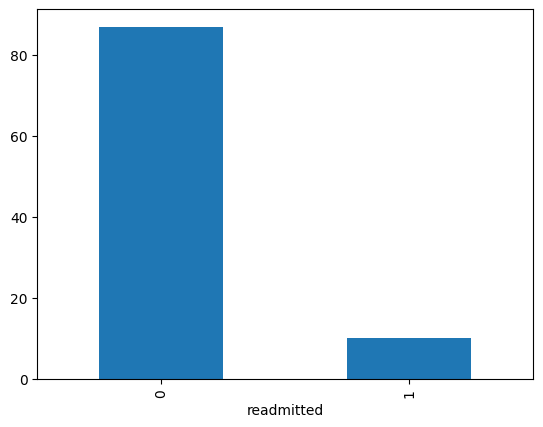

In [21]:
data['readmitted'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

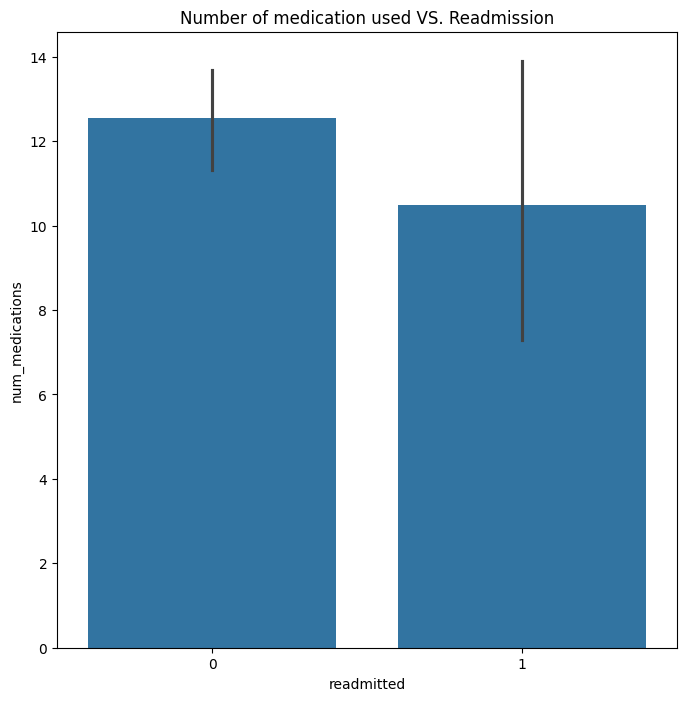

In [22]:
fig = plt.figure(figsize=(8,8))
sb.barplot(x = data['readmitted'], y = data['num_medications']).set_title("Number of medication used VS. Readmission")

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

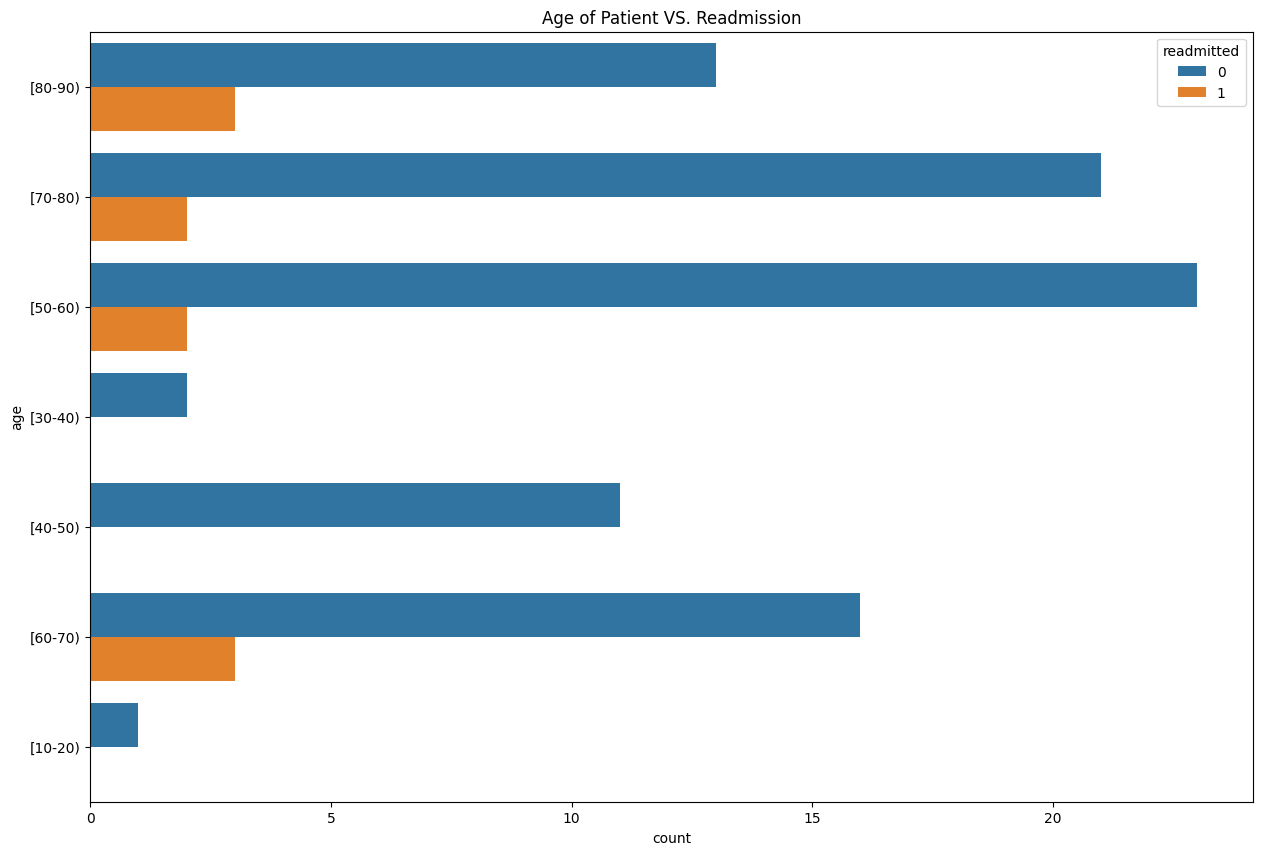

In [23]:
fig = plt.figure(figsize=(15,10))
sb.countplot(y= data['age'], hue = data['readmitted']).set_title('Age of Patient VS. Readmission')

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

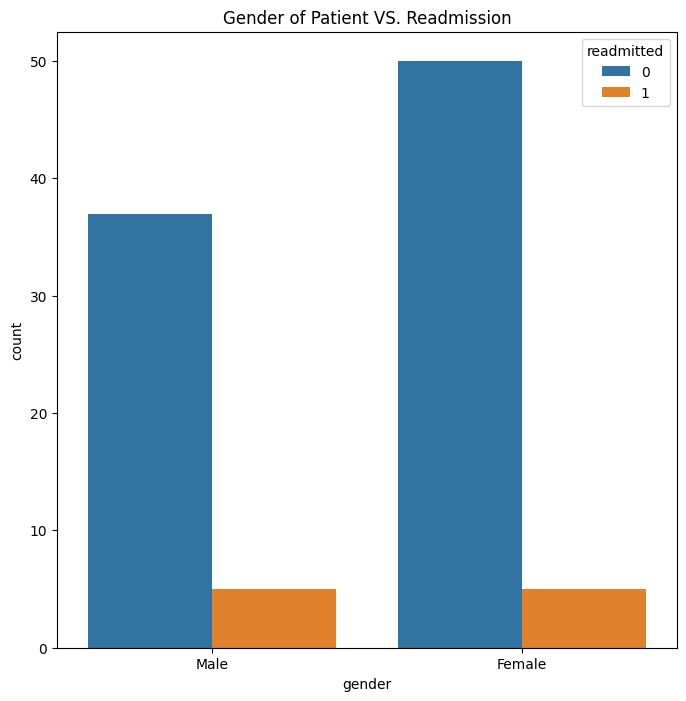

In [24]:
fig = plt.figure(figsize=(8,8))
sb.countplot(x=data['gender'], hue = data['readmitted']).set_title("Gender of Patient VS. Readmission")

Text(0.5, 1.0, 'Change of Medication VS. Readmission')

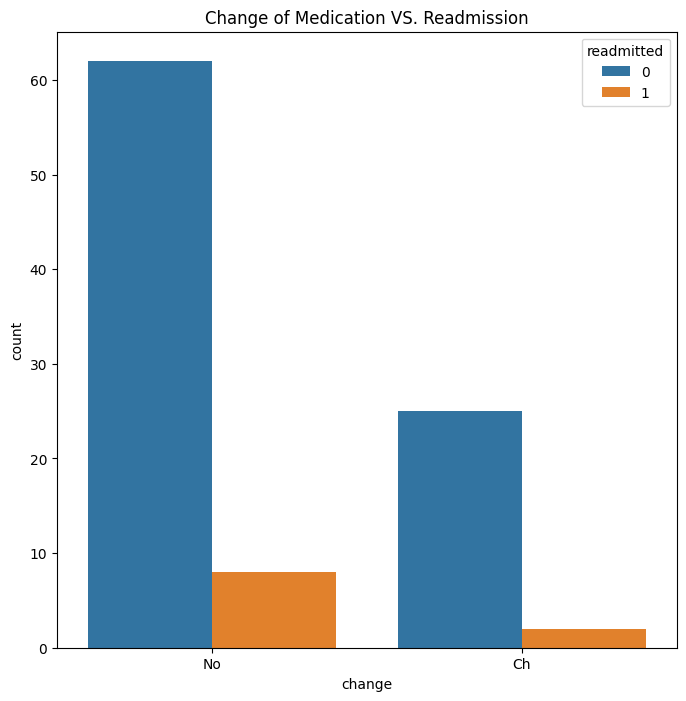

In [25]:
fig = plt.figure(figsize=(8,8))
sb.countplot(x=data['change'], hue = data['readmitted']).set_title('Change of Medication VS. Readmission')

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

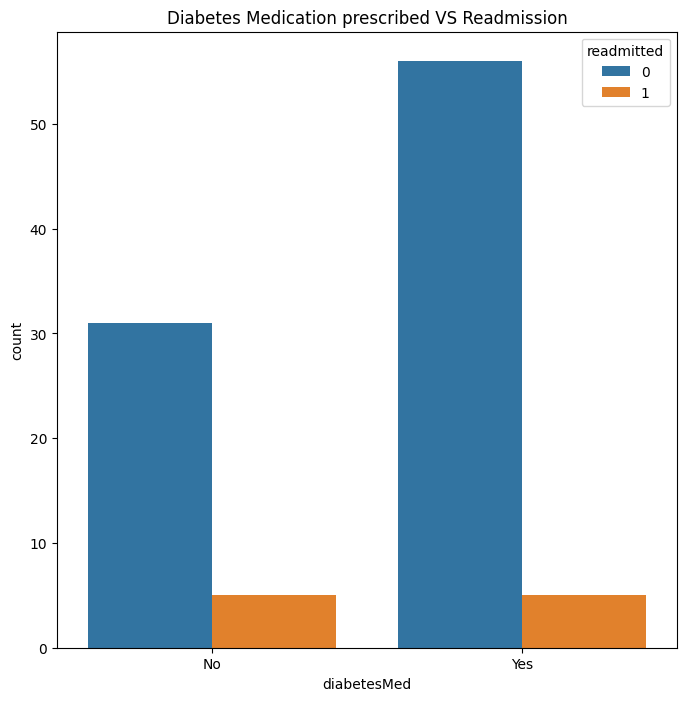

In [26]:
fig = plt.figure(figsize=(8,8))
sb.countplot(x=data['diabetesMed'], hue = data['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')

Text(0.5, 1.0, 'Glucose serum test result VS. Readmission')

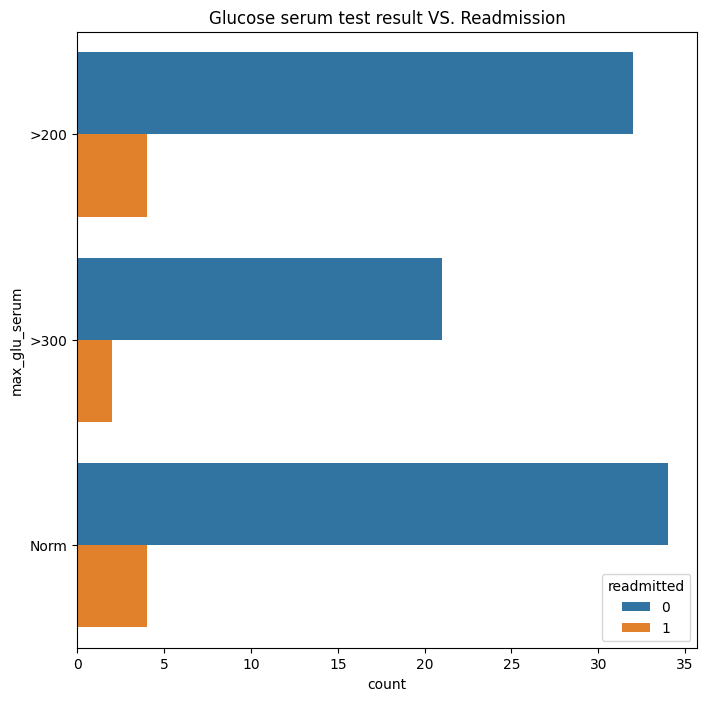

In [27]:
fig = plt.figure(figsize=(8,8))
sb.countplot(y = data['max_glu_serum'], hue = data['readmitted']).set_title('Glucose serum test result VS. Readmission')

<ipython-input-28-2bc542a8b5d8>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sb.kdeplot(data.loc[(data['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
<ipython-input-28-2bc542a8b5d8>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sb.kdeplot(data.loc[(data['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')


Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

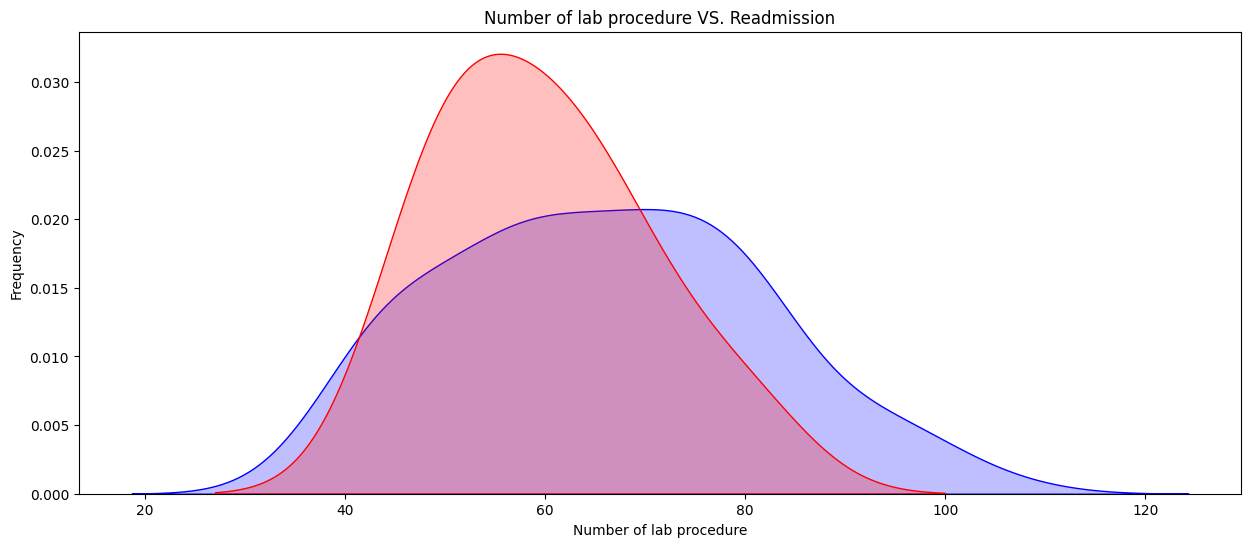

In [28]:
fig = plt.figure(figsize=(15,6),)
ax=sb.kdeplot(data.loc[(data['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sb.kdeplot(data.loc[(data['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

<ipython-input-29-1c0c559250fd>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sb.kdeplot(data.loc[(data['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
<ipython-input-29-1c0c559250fd>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sb.kdeplot(data.loc[(data['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

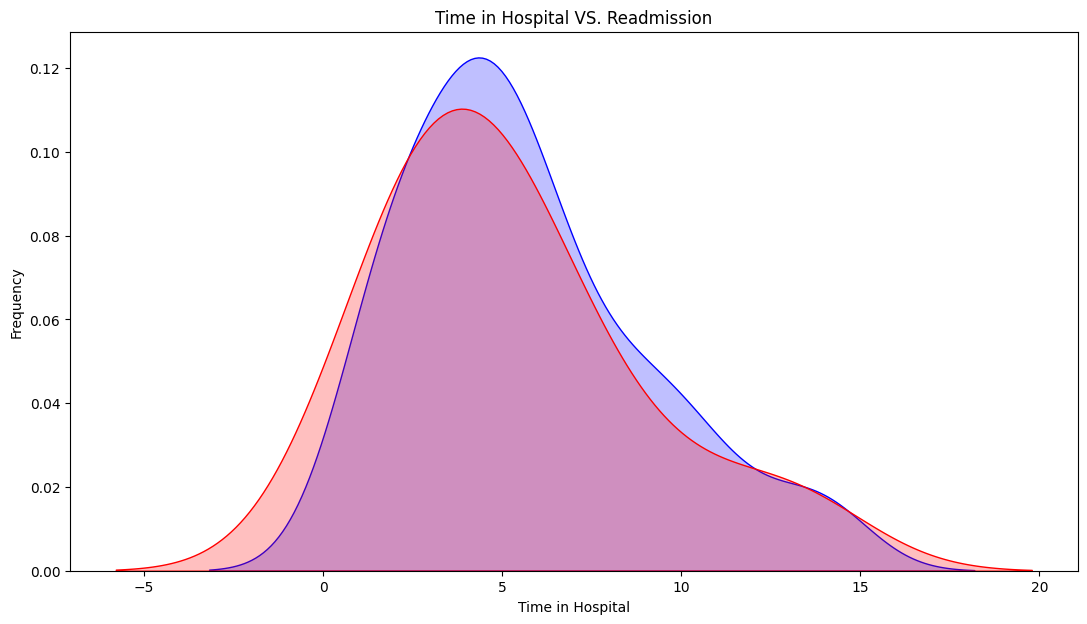

In [29]:
fig = plt.figure(figsize=(13,7),)
ax=sb.kdeplot(data.loc[(data['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sb.kdeplot(data.loc[(data['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

In [30]:
data.describe(include='all')

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,97,97,97,97.0,97.000000,97.00000,97.000000,97.000000,97.000000,97.000000,...,97,97,97,97,97,97,97,97,97,97.000000
unique,5,2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,4,1,1,1,1,1,2,2,NaN
top,Caucasian,Female,[50-60),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NaN
freq,62,55,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97,67,97,97,97,97,97,70,61,NaN
mean,NaN,NaN,NaN,6.0,2.154639,6.57732,5.597938,65.298969,0.773196,12.329897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.103093
std,NaN,NaN,NaN,0.0,2.157063,1.52640,3.405448,15.350193,1.150228,5.866078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.305660
min,NaN,NaN,NaN,6.0,1.000000,1.00000,1.000000,38.000000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,6.0,1.000000,7.00000,3.000000,54.000000,0.000000,8.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,6.0,1.000000,7.00000,5.000000,64.000000,0.000000,11.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,6.0,2.000000,7.00000,7.000000,77.000000,1.000000,16.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [31]:
data = data.replace({'admission_type_id':{2:1,7:1,6:5,8:5}, 'discharge_disposition_id':{6:1,8:1,9:1,13:1,3:2,4:2,5:2,
                    14:2,22:2,23:2,24:2,12:10,15:10,16:10,17:10,25:18,26:18}, 'admission_source_id':{2:1,3:1,5:4,6:4,
                    10:4,22:4,25:4,15:9,17:9,20:9,21:9,13:11,14:11}})

In [32]:
drugs = ['metformin', 'repaglinide', 'glimepiride', 'glipizide',
                'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']
drugs_to_drop =["nateglinide", "chlorpropamide", "acetohexamide", "tolbutamide",
             "acarbose", "miglitol", "troglitazone", "tolazamide", "glyburide-metformin",
                "glipizide-metformin","glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]

In [33]:
for col in drugs:
    data[col] = data[col].replace('No', 0)
    data[col] = data[col].replace('Steady', 1)
    data[col] = data[col].replace('Up', 1)
    data[col] = data[col].replace('Down', 1)

<ipython-input-33-b80a4624625a>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace('Down', 1)
<ipython-input-33-b80a4624625a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace('No', 0)
<ipython-input-33-b80a4624625a>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_down

In [34]:
data.drop(drugs_to_drop, axis=1,inplace=True)

In [35]:
data['A1Cresult'].value_counts()

,count
A1Cresult,
>8,48
>7,30
Norm,19


In [36]:
data['max_glu_serum'].value_counts()

,count
max_glu_serum,
Norm,38
>200,36
>300,23


In [37]:
data['A1Cresult'] = data['A1Cresult'].replace('>7', 1)
data['A1Cresult'] = data['A1Cresult'].replace('>8', 1)
data['A1Cresult'] = data['A1Cresult'].replace('Norm', 0)
data['A1Cresult'] = data['A1Cresult'].replace('None', -99)

data['max_glu_serum'] = data['max_glu_serum'].replace('>200', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('>300', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('Norm', 0)
data['max_glu_serum'] = data['max_glu_serum'].replace('None', -99)

<ipython-input-37-8d70d3470560>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['A1Cresult'] = data['A1Cresult'].replace('Norm', 0)
<ipython-input-37-8d70d3470560>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['max_glu_serum'] = data['max_glu_serum'].replace('Norm', 0)


In [38]:
data['age'].value_counts()

,count
age,
[50-60),25
[70-80),23
[60-70),19
[80-90),16
[40-50),11
[30-40),2
[10-20),1


In [39]:
for i in range(0,10):
    data['age'] = data['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', (10*i+10*(i+1))//2)
data['age'].value_counts()

<ipython-input-39-0708be41686c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['age'] = data['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', (10*i+10*(i+1))//2)


,count
age,
55,25
75,23
65,19
85,16
45,11
35,2
15,1


In [40]:
def conv_diag(icd9):
    try:
        n = float(icd9)
        if (n>=390 and n<=459) or (n==785):
            return "circulatory"
        elif (n>=520 and n<=579) or (n==787):
            return "digestive"
        elif (n>=580 and n<=629) or (n==788):
            return "genitourinary"
        elif np.trunc(n)==250:
            return "diabetes"
        elif (n>=800 and n<=999):
            return "injury"
        elif (n>=710 and n<=739):
            return "musculoskeletal"
        elif (n>140 and n<=239):
            return "neoplasms"
        elif (n>=460 and n<=519) or (n==786):
            return "respiratory"
        else :
            return "other"
    except:
        return "other"

In [41]:
data['diag_1'] = data['diag_1'].apply(conv_diag)
data['diag_2'] = data['diag_2'].apply(conv_diag)
data['diag_3'] = data['diag_3'].apply(conv_diag)

In [42]:
# diag1_num = le.fit_transform(data['diag_1'])
# diag2_num = le.fit_transform(data['diag_2'])
# diag3_num = le.fit_transform(data['diag_3'])

In [43]:
# data['diag_1'] = diag1_num
# data['diag_2'] = diag2_num
# data['diag_3'] = diag3_num

In [44]:
# from sklearn.preprocessing import LabelEncoder
# le= LabelEncoder()
# race = le.fit_transform(data['race'])
# data['race'] = race

In [45]:
data.head().T

,162,460,593,696,771
race,Caucasian,AfricanAmerican,Caucasian,Other,Caucasian
gender,Male,Female,Female,Male,Female
age,85,75,55,75,35
admission_type_id,5,5,5,5,5
discharge_disposition_id,2,1,1,1,1
admission_source_id,7,7,7,7,1
time_in_hospital,5.0,10.0,2.0,11.0,14.0
num_lab_procedures,47.0,72.0,61.0,71.0,43.0
num_procedures,1.0,1.0,0.0,1.0,0.0
num_medications,6.0,19.0,5.0,20.0,11.0


In [46]:
data.reset_index(drop=True)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Male,85,5,2,7,5.0,47.0,1.0,6.0,...,0,0,0,0,0,0,0,No,No,1
1,AfricanAmerican,Female,75,5,1,7,10.0,72.0,1.0,19.0,...,0,0,1,0,0,0,1,Ch,Yes,0
2,Caucasian,Female,55,5,1,7,2.0,61.0,0.0,5.0,...,0,0,0,0,0,0,1,No,Yes,0
3,Other,Male,75,5,1,7,11.0,71.0,1.0,20.0,...,0,0,0,0,0,0,0,No,Yes,0
4,Caucasian,Female,35,5,1,1,14.0,43.0,0.0,11.0,...,0,0,0,0,0,0,0,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Caucasian,Male,85,5,2,7,12.0,58.0,0.0,8.0,...,0,0,0,0,0,0,1,Ch,Yes,0
93,Hispanic,Female,45,5,1,7,10.0,58.0,0.0,19.0,...,0,0,1,0,0,1,0,Ch,Yes,0
94,Hispanic,Female,55,5,1,7,4.0,55.0,0.0,12.0,...,0,0,0,0,0,0,0,No,No,0
95,Caucasian,Male,75,5,2,7,9.0,82.0,0.0,21.0,...,0,0,0,0,0,0,0,No,No,0


In [47]:
data.describe()

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,A1Cresult,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,readmitted
count,97.000000,97.0,97.000000,97.00000,97.000000,97.000000,97.000000,97.000000,97.0,97.000000,...,97.000000,97.000000,97.0,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,64.690722,5.0,1.618557,6.56701,5.597938,65.298969,0.773196,12.329897,0.0,0.010309,...,0.804124,0.175258,0.0,0.020619,0.206186,0.020619,0.030928,0.061856,0.309278,0.103093
std,14.394270,0.0,1.496129,1.56063,3.405448,15.350193,1.150228,5.866078,0.0,0.101535,...,0.398935,0.382162,0.0,0.142842,0.406667,0.142842,0.174022,0.242145,0.464597,0.305660
min,15.000000,5.0,1.000000,1.00000,1.000000,38.000000,0.000000,1.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,5.0,1.000000,7.00000,3.000000,54.000000,0.000000,8.000000,0.0,0.000000,...,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,5.0,1.000000,7.00000,5.000000,64.000000,0.000000,11.000000,0.0,0.000000,...,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,5.0,2.000000,7.00000,7.000000,77.000000,1.000000,16.000000,0.0,0.000000,...,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,85.000000,5.0,10.000000,7.00000,14.000000,105.000000,3.000000,30.000000,0.0,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
X = data.drop('readmitted', axis = 1)
y = data['readmitted']

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [50]:
ct =  ColumnTransformer([('oe',OrdinalEncoder(),['diag_1','diag_2','diag_3','race','change','gender','diabetesMed'])]
                        ,remainder='passthrough')

In [51]:
X = ct.fit_transform(X)

In [52]:
X

array([[6., 6., 0., ..., 0., 0., 0.],
       [1., 6., 7., ..., 0., 0., 1.],
       [6., 6., 1., ..., 0., 0., 1.],
       ...,
       [7., 1., 5., ..., 0., 0., 0.],
       [7., 6., 1., ..., 0., 0., 0.],
       [3., 7., 3., ..., 0., 0., 0.]])

In [53]:
!pip install scikit-learn


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.3,random_state=20)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67, 29), (30, 29), (67,), (30,))

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
!pip install imbalanced-learn


In [58]:
sm = SMOTE(random_state = 20)
X1_res, y1_res = sm.fit_resample(X_train,y_train)

In [59]:
X1_res = np.array(X1_res)

In [60]:
y1_res = np.array(y1_res)

In [61]:
X_train, X_val, y_train, y_val = train_test_split(X1_res,y1_res,test_size=0.3, random_state=20)

In [62]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((84, 29), (36, 29), (84,), (36,))

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc

In [64]:
#Creating a dictionary of all models
model_dict = {}

model_dict['Logistic regression']= LogisticRegression(solver='liblinear',random_state=20)
model_dict['KNN Classifier'] = KNeighborsClassifier()
model_dict['Decision Tree Classifier'] = DecisionTreeClassifier(random_state=20)
model_dict['Random Forest Classifier'] = RandomForestClassifier(random_state=20)
model_dict['AdaBoost Classifier'] = AdaBoostClassifier(random_state=20)
model_dict['Gradient Boosting Classifier'] = GradientBoostingClassifier(random_state=20)


In [65]:
#function to print accuracy of all models
def model_test(X_train, X_test, y_train, y_test,model,model_name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('======================================{}======================================='.format(model_name))
    print('Score is : {}'.format(accuracy))

    print()

In [66]:
for model_name,model in model_dict.items():
    model_test(X_train, X_val, y_train, y_val, model, model_name)

======================================Logistic regression=======================================
Score is : 0.8333333333333334

======================================KNN Classifier=======================================
Score is : 0.8888888888888888

======================================Decision Tree Classifier=======================================
Score is : 0.8333333333333334

======================================Random Forest Classifier=======================================
Score is : 0.9166666666666666



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


======================================AdaBoost Classifier=======================================
Score is : 0.8888888888888888

======================================Gradient Boosting Classifier=======================================
Score is : 0.8611111111111112



In [67]:
for model_name, model in model_dict.items():
    p = model.predict(X_test)
    print('Testing accuracy of ',model_name,'=',accuracy_score(y_test,p))

Testing accuracy of  Logistic regression = 0.6666666666666666
Testing accuracy of  KNN Classifier = 0.7
Testing accuracy of  Decision Tree Classifier = 0.9
Testing accuracy of  Random Forest Classifier = 0.8666666666666667
Testing accuracy of  AdaBoost Classifier = 0.8666666666666667
Testing accuracy of  Gradient Boosting Classifier = 0.9


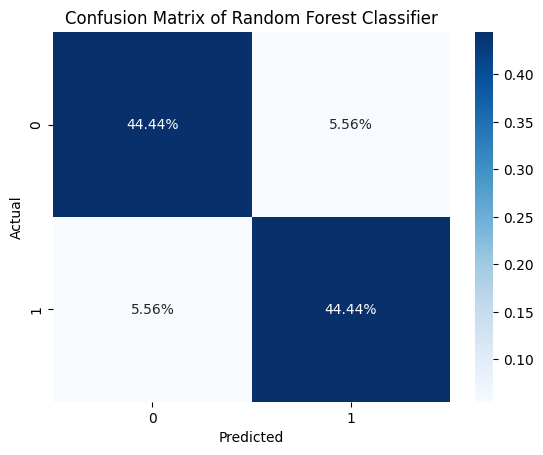

In [68]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)


pred_rfc = rfc.predict(X_val)


cf_matrix = confusion_matrix(y_val, pred_rfc)


sb.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')


plt.show()


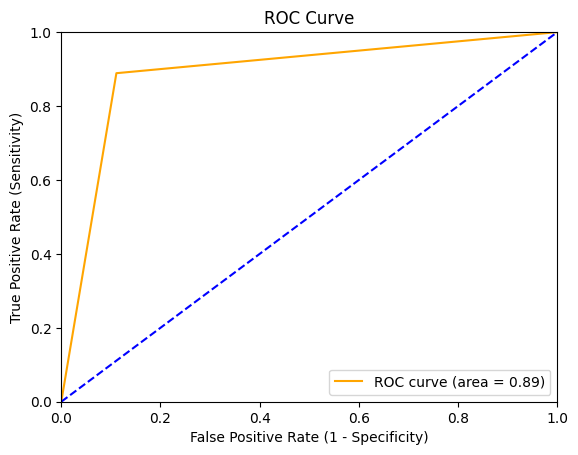

(array([0.        , 0.11111111, 1.        ]),
 array([0.        , 0.88888889, 1.        ]),
 array([inf,  1.,  0.]))

In [69]:
#Plotting ROC curve
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_val, pred_rfc)
roc_auc_rfc = metrics.auc(fpr_rfc, tpr_rfc)
plt.plot(fpr_rfc, tpr_rfc, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_val, pred_rfc)

In [70]:
print(classification_report(y_val,pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.89      0.89      0.89        18

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36



In [71]:
#Fitting data to Random Forest classifier
rfc = RandomForestClassifier(random_state=20)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_val)
print('Training Accuracy of Random Forest=',accuracy_score(y_val,pred_rfc))

Training Accuracy of Random Forest= 0.9166666666666666


In [72]:
cols = list(data.columns)
cols.remove('readmitted')

Feature: 0, Score: 0.03723
Feature: 1, Score: 0.06226
Feature: 2, Score: 0.04056
Feature: 3, Score: 0.03662
Feature: 4, Score: 0.02690
Feature: 5, Score: 0.03174
Feature: 6, Score: 0.09662
Feature: 7, Score: 0.08039
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.10919
Feature: 10, Score: 0.00083
Feature: 11, Score: 0.03008
Feature: 12, Score: 0.10587
Feature: 13, Score: 0.03463
Feature: 14, Score: 0.04601
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.02717
Feature: 18, Score: 0.02649
Feature: 19, Score: 0.06420
Feature: 20, Score: 0.00923
Feature: 21, Score: 0.02490
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00066
Feature: 24, Score: 0.01773
Feature: 25, Score: 0.01607
Feature: 26, Score: 0.00080
Feature: 27, Score: 0.03080
Feature: 28, Score: 0.04301
['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 

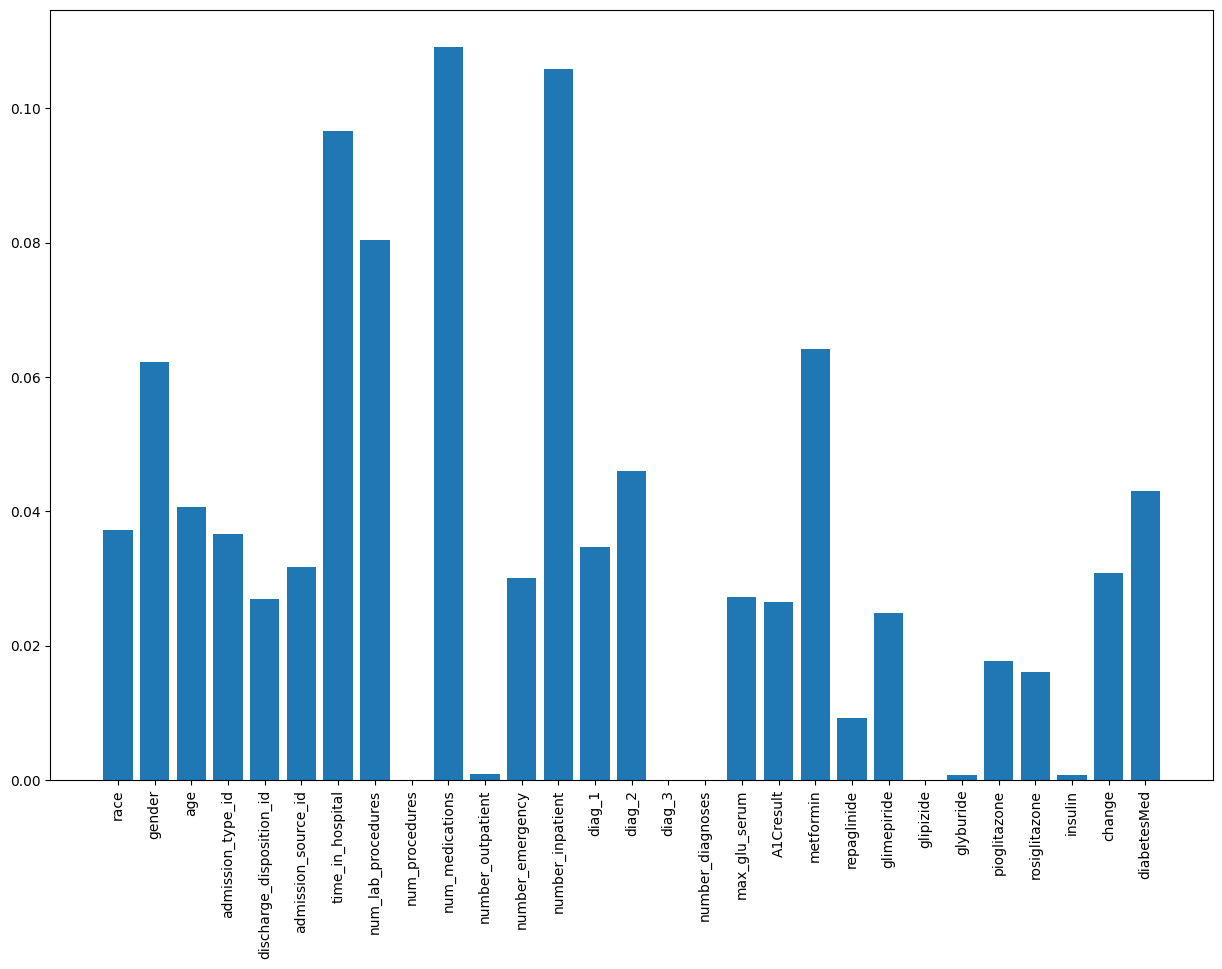

In [73]:
importance = rfc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
print(cols)
plt.figure(figsize=(15,10))
plt.bar([cols[x] for x in range(len(importance))], importance)
plt.xticks(rotation=90)
plt.show()

In [74]:
p = rfc.predict(X_test)
print('Testing Accuracy of Random Forest: ',accuracy_score(y_test,p))

Testing Accuracy of Random Forest:  0.8666666666666667


In [75]:
rfc.predict = [[  8.,   1.,   1.,   1.,   7.,   4.,  24.,   0.,   4.,   1.,   0.]]




In [76]:
imp_cols = []
for i,v in enumerate(importance):
    if (v>0.035):
        imp_cols.append(cols[i])

In [77]:
imp_cols

['race',
 'gender',
 'age',
 'admission_type_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_medications',
 'number_inpatient',
 'diag_2',
 'metformin',
 'diabetesMed']

In [79]:
final_data = data[imp_cols+['readmitted']].copy()

In [80]:
final_data.shape

(97, 12)

In [81]:
X1 = final_data.drop('readmitted', axis = 1)
y1 = final_data['readmitted']

In [82]:
ct =  ColumnTransformer([('oe',OrdinalEncoder(),['diag_1','diag_2','diabetesMed'])]
                        ,remainder='passthrough')

In [83]:
X1.shape, y1.shape

((97, 11), (97,))

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1,
                                                    stratify=y1,
                                                    test_size=0.3, random_state=20)

In [85]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67, 11), (30, 11), (67,), (30,))

In [86]:
X_test[20:40]

,race,gender,age,admission_type_id,time_in_hospital,num_lab_procedures,num_medications,number_inpatient,diag_2,metformin,diabetesMed
11978,Caucasian,Male,45,5,13.0,75.0,16.0,1.0,diabetes,0,Yes
5015,AfricanAmerican,Female,55,5,5.0,95.0,11.0,0.0,diabetes,0,Yes
961,Hispanic,Female,55,5,2.0,66.0,3.0,0.0,circulatory,1,Yes
17096,Caucasian,Male,55,5,6.0,79.0,9.0,0.0,diabetes,0,Yes
28490,Hispanic,Male,65,5,9.0,77.0,16.0,1.0,other,0,No
31157,Hispanic,Female,55,5,6.0,54.0,8.0,0.0,diabetes,0,No
31274,Caucasian,Female,55,5,4.0,45.0,11.0,0.0,other,0,No
3276,Caucasian,Male,75,5,4.0,64.0,3.0,0.0,diabetes,0,Yes
771,Caucasian,Female,35,5,14.0,43.0,11.0,0.0,diabetes,0,No
17838,Hispanic,Female,75,5,1.0,49.0,6.0,0.0,diabetes,0,Yes


In [87]:
y_test[20:40]

,readmitted
11978,0
5015,0
961,1
17096,0
28490,0
31157,0
31274,0
3276,0
771,0
17838,0


In [88]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))

In [89]:
import joblib
joblib.dump(ct,'feature_values')

['feature_values']

In [90]:
new = joblib.load('feature_values')